In [2]:
import os
import re

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns

from bs4 import BeautifulSoup

from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize, sent_tokenize

from collections import Counter

In [3]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [4]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [16]:
df = pd.read_csv("/content/sample_data/youtube_crawling.csv")
df.tail()

,Unnamed: 0,id,content,likes
1280,1280,\n\n ItsAntonio\n \n,\n\nStop\n,\n 0\n
1281,1281,\n\n Mixed Traffic Productions\n ...,\n\nNobody cares\n,\n 0\n
1282,1282,\n\n Awrick Barrin\n \n,\n\nThat was the worst trailer in the world\n,\n 1\n
1283,1283,\n\n green ore\n \n,\n\nDislike\n,\n 0\n
1284,1284,\n\n Ramen رامين रमेन 拉面\n ...,\n\nMC is trash. weak compared to the original...,\n 0\n


In [17]:
# 하나의 스트링
df['content'].values
doc = ''.join(df['content'].values)

# 텍스트 파일로 임시 저장
filepath = "Omniscient Reader (Official Trailer).txt"
f = open("/content/sample_data/" + filepath, 'w')
f.write(doc)
f.close()

In [18]:
# 다시 읽어보기

f = open("/content/sample_data/Omniscient Reader (Official Trailer).txt", 'r')
review = f.read()
f.close()
print(review[:1000])



Read Omniscient Reader now:
https://bit.ly/3j3IWGm


One of the best things is that the MC won’t be in a romantic relationship, so the shippers can go crazy. But, not having romance also is one of the best thing about it.


There's a reason why this is the most popular webnovel in South Korea. 
The MC is not an OP character but he's clever and way more charismatic. He's also a strategist using the knowledge he knows in the novel. He's not an emotionless robot or a killing machine. 
Side characters are not just there to be amazed by the MC, they're actually strong too on their own. They are lovable. 
There is no plot armor (you know what that means)....character deaths. 
The plot might be about survival and you think it's the same for many others. No it's not. You would be surprised. 
So stop comparing this to a power fantasy like Solo Levelling. As much as I love that manga because who hates an OP MC honestly? This far surpasses Solo Levelling because everyone has a mystery.


The “I

In [19]:
#구두점등 특수문자 [!”#$%&’()*+,-./:;<=>?@[]^_`{|}~]  제거

import string
translator = str.maketrans('','',string.punctuation)
result = str(review).translate(translator)
result = result.lower()
print(result)



read omniscient reader now
httpsbitly3j3iwgm


one of the best things is that the mc won’t be in a romantic relationship so the shippers can go crazy but not having romance also is one of the best thing about it


theres a reason why this is the most popular webnovel in south korea 
the mc is not an op character but hes clever and way more charismatic hes also a strategist using the knowledge he knows in the novel hes not an emotionless robot or a killing machine 
side characters are not just there to be amazed by the mc theyre actually strong too on their own they are lovable 
there is no plot armor you know what that meanscharacter deaths 
the plot might be about survival and you think its the same for many others no its not you would be surprised 
so stop comparing this to a power fantasy like solo levelling as much as i love that manga because who hates an op mc honestly this far surpasses solo levelling because everyone has a mystery


the “i just wanted to escape reality” part 

In [20]:
# 이모티콘 제거
result = result.encode('utf-8').decode('ascii', 'ignore') 
result

'\n\nread omniscient reader now\nhttpsbitly3j3iwgm\n\n\none of the best things is that the mc wont be in a romantic relationship so the shippers can go crazy but not having romance also is one of the best thing about it\n\n\ntheres a reason why this is the most popular webnovel in south korea \nthe mc is not an op character but hes clever and way more charismatic hes also a strategist using the knowledge he knows in the novel hes not an emotionless robot or a killing machine \nside characters are not just there to be amazed by the mc theyre actually strong too on their own they are lovable \nthere is no plot armor you know what that meanscharacter deaths \nthe plot might be about survival and you think its the same for many others no its not you would be surprised \nso stop comparing this to a power fantasy like solo levelling as much as i love that manga because who hates an op mc honestly this far surpasses solo levelling because everyone has a mystery\n\n\nthe i just wanted to escap

In [21]:
result = str(result)

In [24]:
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 

stop_words = set(stopwords.words('english')) 
stop_words.update(['reading','read','think','im','constellations','oh','would','like','see','one','know','read','cant','get','hes','dont','good','really','give','right','even','want','doesnt','got'])

word_tokens = word_tokenize(result)

Result = []
for w in word_tokens: 
    if w not in stop_words: 
        Result.append(w) 

print(word_tokens,'\n')
print(Result) 

['read', 'omniscient', 'reader', 'now', 'httpsbitly3j3iwgm', 'one', 'of', 'the', 'best', 'things', 'is', 'that', 'the', 'mc', 'wont', 'be', 'in', 'a', 'romantic', 'relationship', 'so', 'the', 'shippers', 'can', 'go', 'crazy', 'but', 'not', 'having', 'romance', 'also', 'is', 'one', 'of', 'the', 'best', 'thing', 'about', 'it', 'theres', 'a', 'reason', 'why', 'this', 'is', 'the', 'most', 'popular', 'webnovel', 'in', 'south', 'korea', 'the', 'mc', 'is', 'not', 'an', 'op', 'character', 'but', 'hes', 'clever', 'and', 'way', 'more', 'charismatic', 'hes', 'also', 'a', 'strategist', 'using', 'the', 'knowledge', 'he', 'knows', 'in', 'the', 'novel', 'hes', 'not', 'an', 'emotionless', 'robot', 'or', 'a', 'killing', 'machine', 'side', 'characters', 'are', 'not', 'just', 'there', 'to', 'be', 'amazed', 'by', 'the', 'mc', 'theyre', 'actually', 'strong', 'too', 'on', 'their', 'own', 'they', 'are', 'lovable', 'there', 'is', 'no', 'plot', 'armor', 'you', 'know', 'what', 'that', 'meanscharacter', 'deaths'

In [25]:
# 빈도 탐색
cnt = Counter(Result)
vocab_sorted = sorted(cnt.items(), key = lambda x:x[1], reverse = True)
print(vocab_sorted[:20])

[('webtoon', 244), ('novel', 188), ('solo', 116), ('anime', 108), ('leveling', 99), ('story', 96), ('dokja', 93), ('love', 88), ('reader', 83), ('chapters', 62), ('trailer', 61), ('ive', 60), ('best', 57), ('already', 53), ('mc', 49), ('manhwa', 49), ('much', 47), ('na', 46), ('kim', 45), ('make', 43)]


<Figure size 432x288 with 0 Axes>

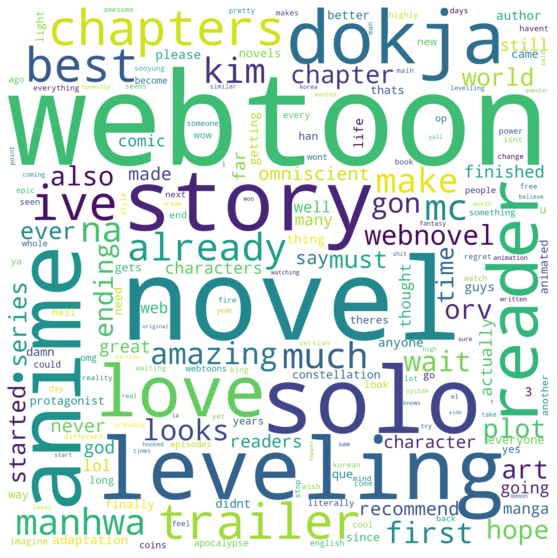

<Figure size 432x288 with 0 Axes>

In [26]:
wc = WordCloud(background_color='white',
#                colormap='Greens',
               width=1000, 
               height=1000, 
               scale=2.0, 
               max_font_size=300)
gen = wc.generate_from_frequencies(cnt)
plt.figure(figsize=(10,10))       
plt.axis('off') 
plt.imshow(wc,interpolation='bilinear')
plt.savefig('(eng)유튜브워드클라우드.png',dpi=200 ,facecolor='#eeeeee')
plt.figure()

In [27]:
keyword = [word[0] for word in vocab_sorted]
"""
keyword = []
for i in range(len(narray)):
    keyword.append(narray[i][0])
keyword[:10]
"""
keyword[:10]

['webtoon',
 'novel',
 'solo',
 'anime',
 'leveling',
 'story',
 'dokja',
 'love',
 'reader',
 'chapters']

In [28]:
frequency = [word[1] for word in vocab_sorted]
frequency[:10]

[244, 188, 116, 108, 99, 96, 93, 88, 83, 62]

In [29]:
df = pd.DataFrame(zip(keyword,frequency))
df.columns = ['keyword','frequency']
df = df.set_index(keys= 'keyword', drop=True)
df

,frequency
keyword,
webtoon,244
novel,188
solo,116
anime,108
leveling,99
...,...
ew,1
cares,1
worst,1


In [30]:
top10 = df[:10].sort_values(by='frequency',ascending=True)
top10

,frequency
keyword,
chapters,62
reader,83
love,88
dokja,93
story,96
leveling,99
anime,108
solo,116
novel,188


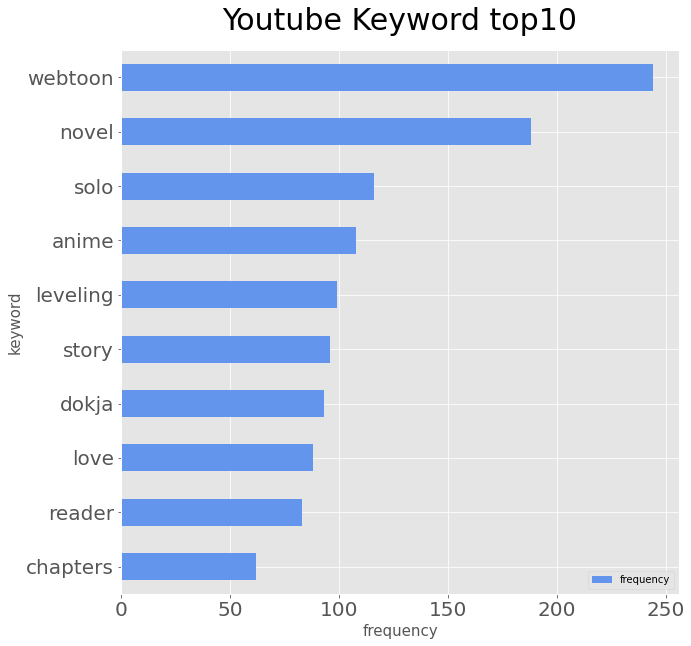

In [32]:
top10.plot(kind='barh', color='cornflowerblue', width=0.5, figsize=(10,10),fontsize=20 )
plt.style.use('ggplot')
plt.title('Youtube Keyword top10', fontsize=30 , loc ='center', pad=20)
# plt.legend(loc='best')
plt.xlabel('frequency', size = 15)
plt.ylabel('keyword', size = 15)
plt.savefig('(eng)유튜브_Bar.png',dpi=400 ,facecolor='#eeeeee')
plt.show()